In [407]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
from dateutil.parser import parse

# Loading Google Play Store
file_to_load = "archive_android/googleplaystore.csv"

# Read Google Play Store File and store into Pandas data frame
google_playstore = pd.read_csv(file_to_load)
google_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [408]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from dateutil.parser import parse

# Loading App Store 
file_to_load = "archive_ios/AppleStore.csv"

# Read Apple Store File and store into Pandas data frame
apple_store = pd.read_csv(file_to_load)
apple_store.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.990000,21292,26,4.000000,4.500000,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.000000,161065,26,4.000000,3.500000,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.000000,188583,2822,3.500000,4.500000,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.000000,262241,649,4.000000,4.500000,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.000000,985920,5320,4.500000,5.000000,7.5.1,4+,Reference,37,5,45,1


# Cleaning Google Play Store Data

In [409]:
# Looking for all Columns Names
google_playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [410]:
# Looking for all available categories in my DF
google_playstore["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [411]:
# Selecting only the Games from my Google App List
google_playstore_games = google_playstore.loc[google_playstore["Category"]=="GAME",:]
google_playstore_games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.500000,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.500000,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.400000,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.700000,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.500000,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [412]:
# Counting my data for cleaning
google_playstore_games.count()

App               1144
Category          1144
Rating            1097
Reviews           1144
Size              1144
Installs          1144
Type              1144
Price             1144
Content Rating    1144
Genres            1144
Last Updated      1144
Current Ver       1144
Android Ver       1144
dtype: int64

In [413]:
# Dropping rows with missing information
google_playstore_games = google_playstore_games.dropna(how="any")
google_playstore_games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.500000,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.500000,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.400000,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.700000,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.500000,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [414]:
# Looking for all Genres available in my Google Play Store Data Frame
google_playstore_games["Genres"].unique()

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Casino'], dtype=object)

In [415]:
# Merging Genres to avoid to have duplicates or similars
google_playstore_games["Genres"] = google_playstore_games["Genres"].replace({"Action":"Action & Adventure",
                                                                            "Adventure":"Action & Adventure",
                                                                            "Adventure;Action & Adventure": "Action & Adventure",
                                                                            "Action;Action & Adventure":"Action & Adventure",
                                                                            "Casual;Pretend Play":"Pretend Play",
                                                                             "Casual;Creativity":"Creativity",
                                                                            "Casual;Action & Adventure":"Action & Adventure",
                                                                            "Simulation;Education":"Education",
                                                                            "Casual;Brain Games":"Brain Games",
                                                                            "Simulation;Action & Adventure":"Action & Adventure"})
google_playstore_games["Genres"].unique()

array(['Action & Adventure', 'Arcade', 'Casual', 'Card', 'Pretend Play',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Creativity', 'Simulation', 'Board', 'Trivia', 'Role Playing',
       'Education', 'Brain Games', 'Casino'], dtype=object)

In [416]:
# Converting the string form of installs into interger
google_playstore_games["Installs"] = google_playstore_games["Installs"].str.replace('+', '')
google_playstore_games["Installs"] = google_playstore_games["Installs"].str.replace(',', '')
google_playstore_games["Installs"] = google_playstore_games["Installs"].astype(int)
google_playstore_games

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.500000,4447388,67M,100000000,Free,0,Everyone 10+,Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.500000,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.400000,22426677,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.700000,254258,23M,10000000,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.500000,148897,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.000000,1287,38M,50000,Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.200000,21661,16M,1000000,Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.400000,28510,78M,500000,Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.300000,56496,81M,1000000,Free,0,Teen,Action & Adventure,"August 7, 2018",1.5.447,4.0 and up


In [417]:
# Dropping Duplicate Apps
google_playstore_games=google_playstore_games.drop_duplicates(subset=["App"])
google_playstore_games

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.500000,4447388,67M,100000000,Free,0,Everyone 10+,Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.500000,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.400000,22426677,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.700000,254258,23M,10000000,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.500000,148897,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.000000,1287,38M,50000,Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.200000,21661,16M,1000000,Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.400000,28510,78M,500000,Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.300000,56496,81M,1000000,Free,0,Teen,Action & Adventure,"August 7, 2018",1.5.447,4.0 and up


# Cleaning App Store Data

In [418]:
# Renaming Columns of Interest
apple_store = apple_store.rename(columns = {"Unnamed: 0":"Index","id":"ID","track_name":"App","size_bytes":"Size",
                                            "currency":"Currency","price":"Price","rating_count_tot":"Reviews",
                                            "user_rating":"Rating","cont_rating":"Content Rating","prime_genre":"Genres"})
apple_store.head()          

,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.990000,21292,26,4.000000,4.500000,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.000000,161065,26,4.000000,3.500000,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.000000,188583,2822,3.500000,4.500000,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.000000,262241,649,4.000000,4.500000,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.000000,985920,5320,4.500000,5.000000,7.5.1,4+,Reference,37,5,45,1


In [419]:
# Looking for only games in App Store, and creating a new games dataframe
apple_store_games = apple_store.loc[apple_store["Genres"]=="Games",:]
apple_store_games.head()

,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.990000,21292,26,4.000000,4.500000,6.3.5,4+,Games,38,5,10,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.990000,8253,5516,4.000000,4.000000,1.8,4+,Games,47,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.990000,7885,40,4.000000,4.000000,4.0.4,4+,Games,38,0,10,1
10,11,284791396,Solitaire by MobilityWare,49618944,USD,4.990000,76720,4017,4.500000,4.500000,4.10.1,4+,Games,38,4,11,1
11,12,284815117,SCRABBLE Premium,227547136,USD,7.990000,105776,166,3.500000,2.500000,5.19.0,4+,Games,37,0,6,1


In [420]:
# Looking for missing values
apple_store_games.count()

Index               3862
ID                  3862
App                 3862
Size                3862
Currency            3862
Price               3862
Reviews             3862
rating_count_ver    3862
Rating              3862
user_rating_ver     3862
ver                 3862
Content Rating      3862
Genres              3862
sup_devices.num     3862
ipadSc_urls.num     3862
lang.num            3862
vpp_lic             3862
dtype: int64

In [421]:
# Dropping possible duplicate Apps
apple_store_games = apple_store_games.drop_duplicates(subset=["App"])
apple_store_games.head()

,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.990000,21292,26,4.000000,4.500000,6.3.5,4+,Games,38,5,10,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.990000,8253,5516,4.000000,4.000000,1.8,4+,Games,47,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.990000,7885,40,4.000000,4.000000,4.0.4,4+,Games,38,0,10,1
10,11,284791396,Solitaire by MobilityWare,49618944,USD,4.990000,76720,4017,4.500000,4.500000,4.10.1,4+,Games,38,4,11,1
11,12,284815117,SCRABBLE Premium,227547136,USD,7.990000,105776,166,3.500000,2.500000,5.19.0,4+,Games,37,0,6,1


In [422]:
# Top Rated and Reviewed Games in Apple Store
# (Lo sortee de esta manera porque pienso que son los dos valores de interes que nos pueden servir en este 
# Dataframe debido a que no tenemos el numero de descargas)

apple_store_games = apple_store_games.sort_values(by=["Rating","Reviews"], ascending = (False,False))
apple_store_games.head()

,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121319424,USD,0.000000,481564,8518,5.000000,5.000000,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105379840,USD,0.990000,426463,680,5.000000,4.000000,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.000000,386521,10332,5.000000,5.000000,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69076992,USD,0.000000,370370,2650,5.000000,4.500000,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624107810,USD,0.990000,326482,177050,5.000000,5.000000,1.4.1,12+,Games,43,5,13,1


In [423]:
# Formating the Content Rating of Apple in order to have the same values as Android Content Rating
# Where:
    # 4+ = Everyone
    # 9+ = Everyone 10+
    # 12+ = Teen
    # 17+ = Mature 17+

# Tanto en PLay Store como en App Store las categorias son 4, decidi que se podrian relacionar una con otras, y esta fue la 
# relación mas logica que encontre, y es que se me hizo util porque tener las mismas categorias en ambos dataframes
# nos podria servir de mucho, a la hora de realizar comparaciones a futuro

apple_store_games["Content Rating"].replace({"4+":"Everyone","9+":"Everyone 10+","12+":"Teen",
                                             "17+":"Mature 17+"}, inplace = True)
apple_store_games



,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121319424,USD,0.000000,481564,8518,5.000000,5.000000,5.4.1,Everyone,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105379840,USD,0.990000,426463,680,5.000000,4.000000,1.9.13,Everyone 10+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.000000,386521,10332,5.000000,5.000000,1.17.6,Mature 17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69076992,USD,0.000000,370370,2650,5.000000,4.500000,2.11,Everyone,Games,37,4,1,1
498,568,387428400,Infinity Blade,624107810,USD,0.990000,326482,177050,5.000000,5.000000,1.4.1,Teen,Games,43,5,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,11033,1185209084,Saloons Unleashed,327731200,USD,0.990000,0,0,0.000000,0.000000,1.1,Everyone,Games,37,5,1,1
7181,11038,1185428381,剑倚手游,178160640,USD,0.990000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,40,5,0,1
7184,11042,1185731859,剑客情缘-高爆率高掉落天天疯玩,171944960,USD,0.000000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,40,5,0,1
7185,11043,1185777521,问仙奇遇-新玩法新套装嗨到爆,208026624,USD,0.990000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,38,5,1,1


# Cleaned Data Frames

In [424]:
apple_store_games = apple_store_games.reset_index()
apple_store_games["Reviews"] = apple_store_games["Reviews"].astype(int)
apple_store_games

,index,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1104,1289,487119327,Head Soccer,121319424,USD,0.000000,481564,8518,5.000000,5.000000,5.4.1,Everyone,Games,40,4,11,1
1,302,341,350642635,Plants vs. Zombies,105379840,USD,0.990000,426463,680,5.000000,4.000000,1.9.13,Everyone 10+,Games,38,0,5,1
2,3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.000000,386521,10332,5.000000,5.000000,1.17.6,Mature 17+,Games,40,5,9,1
3,2177,2537,698255242,Geometry Dash Lite,69076992,USD,0.000000,370370,2650,5.000000,4.500000,2.11,Everyone,Games,37,4,1,1
4,498,568,387428400,Infinity Blade,624107810,USD,0.990000,326482,177050,5.000000,5.000000,1.4.1,Teen,Games,43,5,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,7178,11033,1185209084,Saloons Unleashed,327731200,USD,0.990000,0,0,0.000000,0.000000,1.1,Everyone,Games,37,5,1,1
3856,7181,11038,1185428381,剑倚手游,178160640,USD,0.990000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,40,5,0,1
3857,7184,11042,1185731859,剑客情缘-高爆率高掉落天天疯玩,171944960,USD,0.000000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,40,5,0,1
3858,7185,11043,1185777521,问仙奇遇-新玩法新套装嗨到爆,208026624,USD,0.990000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,38,5,1,1


In [425]:
google_playstore_games = google_playstore_games.reset_index()
google_playstore_games["Price"] = google_playstore_games["Price"].str.replace('$', '')
google_playstore_games["Price"] = google_playstore_games["Price"].astype(float)
google_playstore_games["Reviews"] =google_playstore_games["Reviews"].astype(int)
google_playstore_games

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1653,ROBLOX,GAME,4.500000,4447388,67M,100000000,Free,0.000000,Everyone 10+,Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1,1654,Subway Surfers,GAME,4.500000,27722264,76M,1000000000,Free,0.000000,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2,1655,Candy Crush Saga,GAME,4.400000,22426677,74M,500000000,Free,0.000000,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3,1656,Solitaire,GAME,4.700000,254258,23M,10000000,Free,0.000000,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
4,1657,Bubble Shooter,GAME,4.500000,148897,46M,10000000,Free,0.000000,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,10791,Winter Wonderland,GAME,4.000000,1287,38M,50000,Free,0.000000,Everyone,Word,"December 18, 2013",1.0,2.2 and up
909,10792,Soccer Clubs Logo Quiz,GAME,4.200000,21661,16M,1000000,Free,0.000000,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
910,10793,Sid Story,GAME,4.400000,28510,78M,500000,Free,0.000000,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
911,10803,Fatal Raid - No.1 Mobile FPS,GAME,4.300000,56496,81M,1000000,Free,0.000000,Teen,Action & Adventure,"August 7, 2018",1.5.447,4.0 and up


# Top 100 Games Analysis and Visualization

                            Google Store Data

In [426]:
import random
import matplotlib.pyplot as plt
import scipy.stats as st

In [427]:
path_figures = "car_part_figs/"
google_playstore_games=google_playstore_games.sort_values(by=["Installs"], ascending = False)

In [428]:
#Getting the top 100 games using iloc, after the google_playstore_games was sorted by installs
hundred_games_df = google_playstore_games.iloc[0:100,:]
hundred_games_df.head(50)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,1654,Subway Surfers,GAME,4.500000,27722264,76M,1000000000,Free,0.000000,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2,1655,Candy Crush Saga,GAME,4.400000,22426677,74M,500000000,Free,0.000000,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
55,1722,My Talking Tom,GAME,4.500000,14891223,Varies with device,500000000,Free,0.000000,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
8,1661,Temple Run 2,GAME,4.300000,8118609,62M,500000000,Free,0.000000,Everyone,Action & Adventure,"July 5, 2018",1.49.1,4.0 and up
9,1662,Pou,GAME,4.300000,10485308,24M,500000000,Free,0.000000,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
69,1758,Hungry Shark Evolution,GAME,4.500000,6074334,100M,100000000,Free,0.000000,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
481,5950,Banana Kong,GAME,4.400000,3452530,68M,100000000,Free,0.000000,Everyone,Action & Adventure,"February 7, 2018",1.9.6.6,4.0.3 and up
532,6554,Skater Boy,GAME,4.300000,1167143,12M,100000000,Free,0.000000,Everyone,Arcade,"September 20, 2017",1.18.35,4.1 and up
224,3897,Super Mario Run,GAME,3.700000,1221896,70M,100000000,Free,0.000000,Everyone,Action & Adventure,"July 12, 2018",3.0.11,4.2 and up
86,1781,Trivia Crack,GAME,4.500000,6427773,95M,100000000,Free,0.000000,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up


In [429]:
#For the top 100 games, we grouped by Genres to obtain the distribution by Genres of this group
hundred_games_groupby = hundred_games_df.groupby(by="Genres")
#Getting the count for each group, so we can graph it
count_genres = hundred_games_groupby["Genres"].count()
count_genres

Genres
Action & Adventure    30
Arcade                25
Board                  2
Casino                 1
Casual                 9
Music                  2
Pretend Play           1
Puzzle                 4
Racing                13
Role Playing           1
Simulation             1
Sports                 3
Strategy               5
Trivia                 1
Word                   2
Name: Genres, dtype: int64

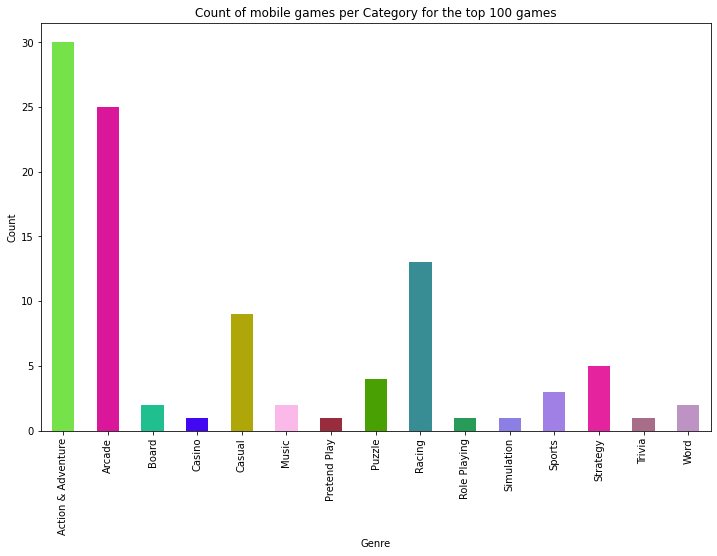

In [430]:
#Generating a color list to display our count by Genres
color_list = []
for colors in range(count_genres.count()):
    color_list.append([random.random(),random.random(),random.random()])
#Plotting the count_genres information
count_genres.plot(kind="bar",color=color_list,figsize=(12,7.5),title="Count of mobile games per Category for the top 100 games")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.savefig(path_figures+"count_category_100games_bar.png",bbox_inches='tight')

We can observe that the top groups, for the top 100 games are: Action & Adventure, Arcade, Racing and Casual.

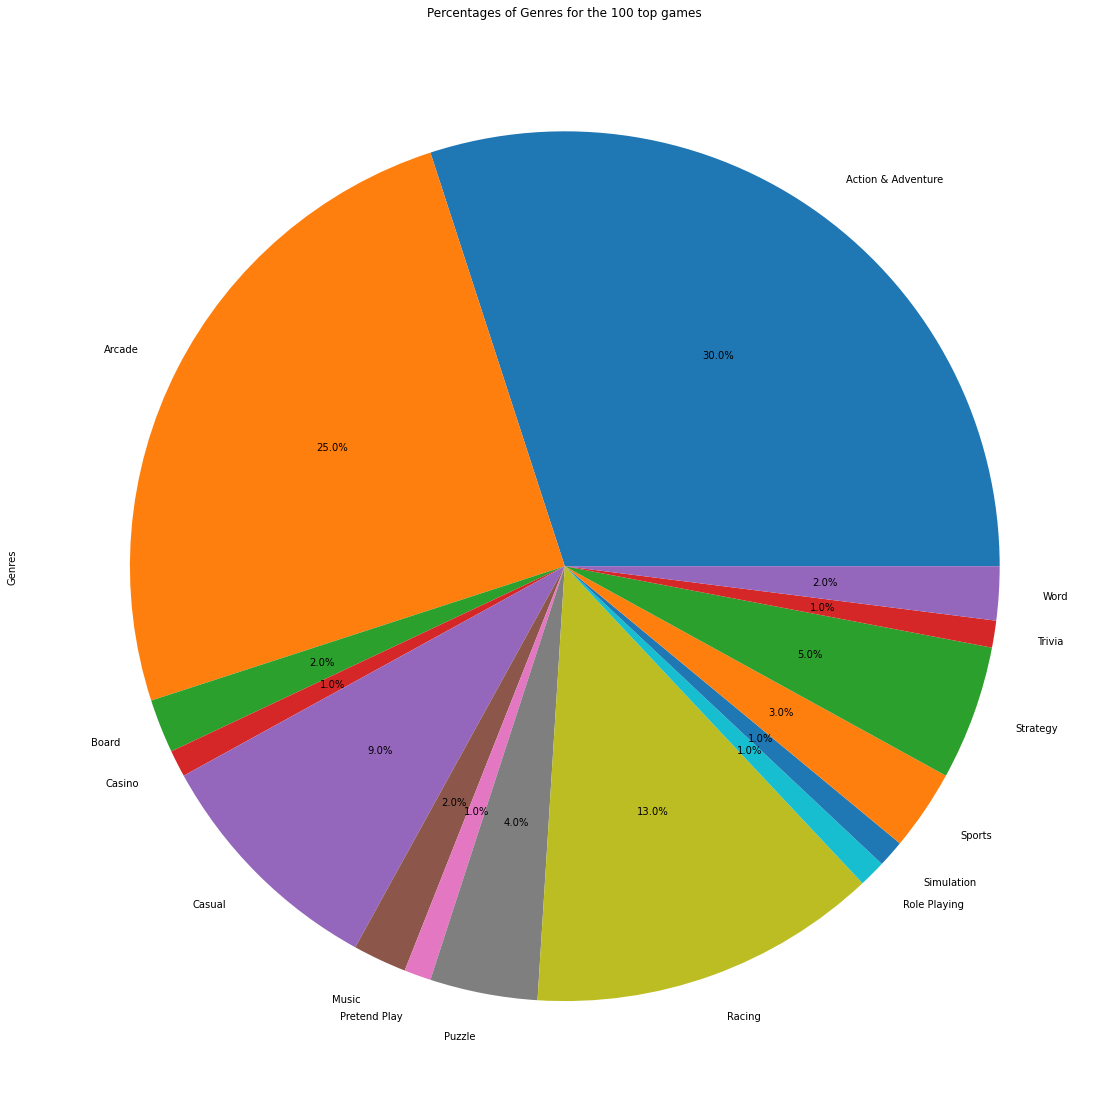

In [431]:
#Generating a pie plot for the same cause
count_genres.plot(kind="pie",figsize=(25,20),autopct='%1.1f%%',title="Percentages of Genres for the 100 top games")
plt.savefig(path_figures+"count_category_100games_pie.png",bbox_inches='tight')

In [432]:
#defining another dataframe and a groupby object, by genre. Then we get for every group, the sum of its installs
installs_info = hundred_games_df
installs_groupby = installs_info.groupby(by="Genres")
sum_installs = installs_groupby["Installs"].sum()
sum_installs

Genres
Action & Adventure    2750000000
Arcade                3150000000
Board                  100000000
Casino                  50000000
Casual                2050000000
Music                  100000000
Pretend Play            50000000
Puzzle                 350000000
Racing                1000000000
Role Playing            50000000
Simulation              50000000
Sports                 300000000
Strategy               400000000
Trivia                 100000000
Word                   100000000
Name: Installs, dtype: int64

In [ ]:
#Generating a plot for the sums of installs per category
sum_installs.plot(kind="bar",color=color_list,figsize=(15,10),title="Sum of installs per Category for the top 100 games")
plt.ylabel("Sum of Installs")
plt.savefig(path_figures+"sum_category_100games_bar.png",bbox_inches='tight')

As we can see, the same 4 genres stand on top of the sum of installs, however we see a variation between the highest bars, in the Count per genre plot, the top bar is Action & Adventure. Here, it is arcade.

In [ ]:
#We wanted to get the correlation between the Count per Genres and the Sum of Installs per genre
plt.scatter(count_genres,sum_installs)
plt.xlabel("Count of Games per Genres")
plt.ylabel("Sum of Installs per Genres")
plt.title("Sum of Installs vs Count of Games per Genres")
correlation_count_sum = st.pearsonr(count_genres,sum_installs)[0]
print(correlation_count_sum)
plt.savefig(path_figures+"correlation_count_sum_genre.png",bbox_inches='tight')

There is a clear relationship between Sum of Installs per Genre and the Count of Games per Genre. This let us think that in our group, the more games a genre has, the more Installs it will have, meaning that the installs distribution is homogeneous.

In [ ]:
#Revising the type values existing 
hundred_games_df["Type"].unique()

In [ ]:
#Grouping by Type and and counting the values per Type
type_sell_groupby = hundred_games_df.groupby(by="Type")
type_sell_count = type_sell_groupby["Type"].count()
type_sell_count.plot(kind="pie",figsize=(20,10),autopct='%1.1f%%',title="Percentages of Type Sell for the 100 most popular games")
plt.savefig(path_figures+"count_type_pie.png",bbox_inches='tight')

As can be seen, the 100% of the top games on Apple Store are free. Meaning that the the free games (and obviously good), are the ones that will be downloaded the most.

In [ ]:
#We grouped by Content Rating to know what content type is the most used in the top 100 games
content_rating_groupby = hundred_games_df.groupby(by="Content Rating")
content_rating_count = content_rating_groupby["Content Rating"].count()
content_rating_count

In [ ]:
#Generating a plot for the count of Content rating for top 100 games.
content_rating_count.plot(kind="bar",color=color_list)
plt.ylabel("Count")
plt.title("Count of Content Rating for top 100 games")
plt.savefig(path_figures+"count_content_bar.png",bbox_inches='tight')

The most common content rating for the top 100 games are Everyon, this showcases that the people prefer the non-violent games and dont like more adult oriented contents.

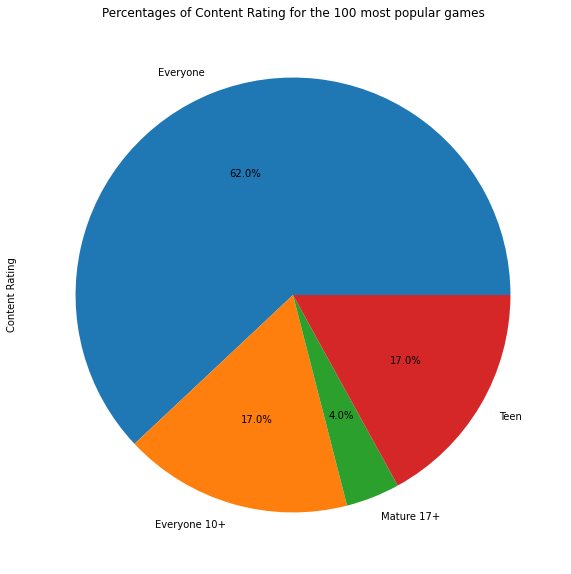

In [334]:
#Showing the same information, but in a pie plot.
content_rating_count.plot(kind="pie",figsize=(20,10),autopct='%1.1f%%',title="Percentages of Content Rating for the 100 most popular games")
plt.savefig(path_figures+"count_content_pie.png",bbox_inches='tight')

In [335]:
#Obtaining the installs per Content Rating group
installs_percontent_groupby = hundred_games_df.groupby(by="Content Rating")
installs_percontent = installs_percontent_groupby["Installs"].sum()
installs_percontent

Content Rating
Everyone        6900000000
Everyone 10+    2300000000
Mature 17+       300000000
Teen            1100000000
Name: Installs, dtype: int64

0.9860097729993188


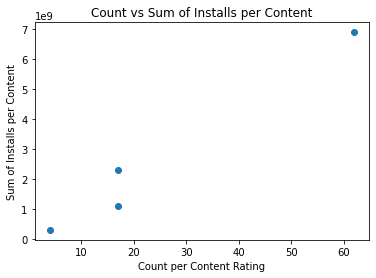

In [336]:
#Generating a Scatter Plot from Count of Content vs Sum of Installs
plt.scatter(content_rating_count,installs_percontent)
plt.xlabel("Count per Content Rating")
plt.ylabel("Sum of Installs per Content")
plt.title("Count vs Sum of Installs per Content")
correlation_cont_installs = st.pearsonr(content_rating_count,installs_percontent)[0]
print(correlation_cont_installs)
plt.savefig(path_figures+"correlation_count_sum_content.png",bbox_inches='tight')

There is a clear relationship between Sum of Installs per Content Rating and the Count of Games per Content Rating. This let us think that in our group, the more games a content rating has, the more Installs it will have, meaning that the installs distribution is homogeneous.

0.04606194909865989


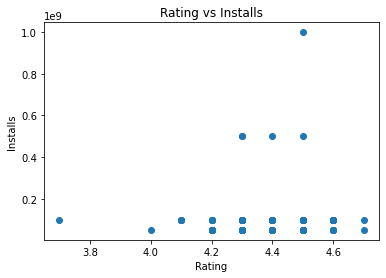

In [337]:
#Looking for correlation between Content Rating and Sum of Installs
plt.scatter(hundred_games_df["Rating"],hundred_games_df["Installs"])
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.title("Rating vs Installs")
print(st.pearsonr(hundred_games_df["Rating"],hundred_games_df["Installs"])[0])
plt.savefig(path_figures+"correlation_rating_installs.png",bbox_inches='tight')

It does not seem that there is a clear correlation between the Rating and the number of installs. The correlation coefficient is 0.04

/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


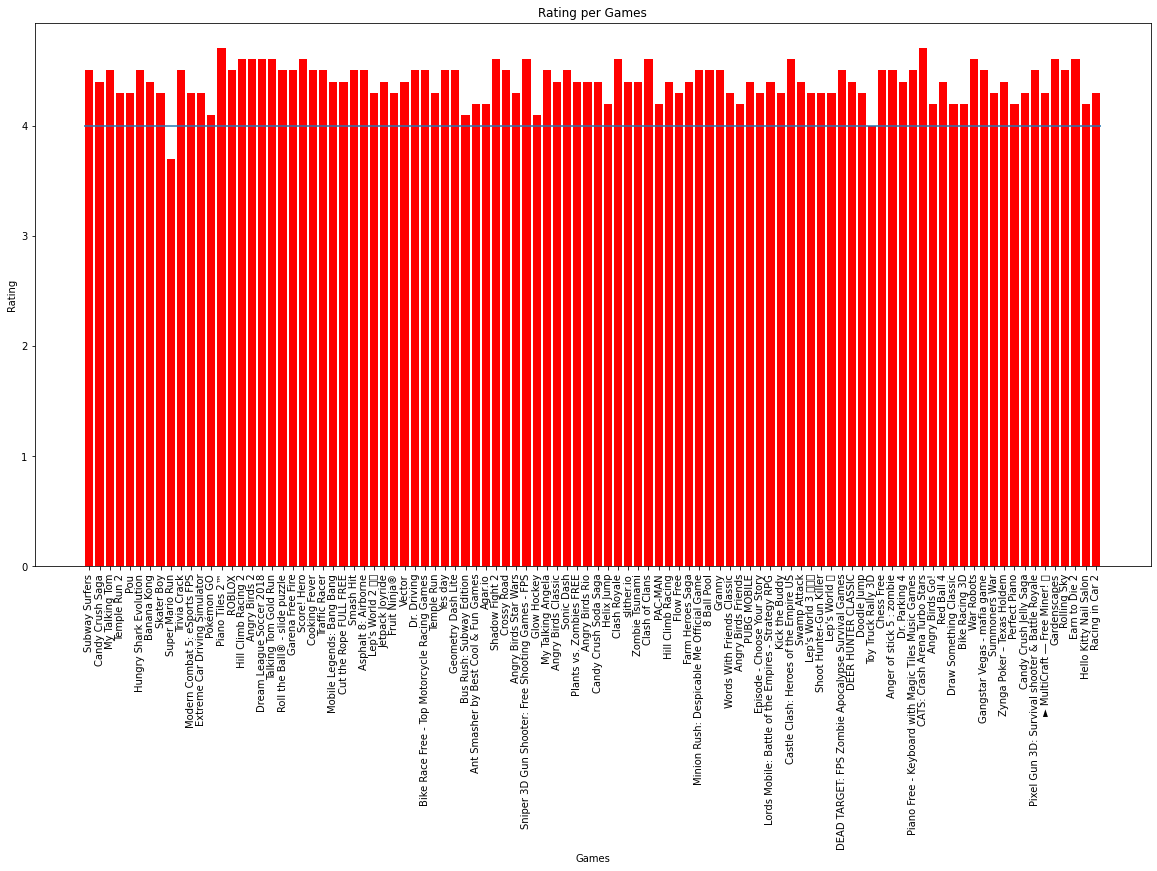

In [338]:
#Noticing that the great majority of the games, are over the 4.0 rating line
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
plt.hlines(4,-0.5,99.5)
plt.bar(hundred_games_df["App"],hundred_games_df["Rating"],color='r')
plt.xlabel("Games")
plt.ylabel("Rating")
plt.title("Rating per Games")
plt.savefig(path_figures+"rating_pergame.png",bbox_inches='tight')

As you can see, most of the games are between 4.0 and 5.0 rating.

                            Apple Store Data

In [339]:
apple_hundred_df = apple_store_games.sort_values(by="Reviews",ascending=False)
apple_hundred_df = apple_hundred_df.iloc[0:100,:]
#Separating between entre free y  paid
free_games = apple_hundred_df.loc[apple_hundred_df["Price"]==0,:]

paid_games = apple_hundred_df.loc[apple_hundred_df["Price"]!=0,:]
apple_hundred_df.head(20)

,index,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
277,1346,1561,529479190,Clash of Clans,116476928,USD,0.000000,2130805,579,4.500000,4.500000,9.24.12,Everyone 10+,Games,38,5,18,1
278,707,810,420009108,Temple Run,65921024,USD,0.000000,1724546,3842,4.500000,4.000000,1.6.2,Everyone 10+,Games,40,5,1,1
279,1493,1731,553834731,Candy Crush Saga,222846976,USD,0.000000,961794,2453,4.500000,4.500000,1.101.0,Everyone,Games,43,5,24,1
280,275,310,343200656,Angry Birds,175966208,USD,0.000000,824451,107,4.500000,3.000000,7.4.0,Everyone,Games,38,0,10,1
281,1246,1450,512939461,Subway Surfers,156038144,USD,0.000000,706110,97,4.500000,4.000000,1.72.1,Everyone 10+,Games,38,5,1,1
282,348,393,362949845,Fruit Ninja Classic,104590336,USD,1.990000,698516,132,4.500000,4.000000,2.3.9,Everyone,Games,38,5,13,1
283,343,386,359917414,Solitaire,101943296,USD,0.000000,679055,9673,4.500000,4.500000,4.11.2,Everyone,Games,38,4,11,1
284,990,1143,469369175,CSR Racing,524803072,USD,0.000000,677247,2029,4.500000,4.500000,4.0.1,Everyone,Games,37,5,10,1
285,3042,3637,924373886,Crossy Road - Endless Arcade Hopper,165471232,USD,0.000000,669079,1087,4.500000,4.500000,1.5.4,Everyone 10+,Games,38,5,13,1
286,1634,1895,575658129,Injustice: Gods Among Us,1829599232,USD,0.000000,612532,410,4.500000,4.500000,2.15.1,Teen,Games,39,5,13,1


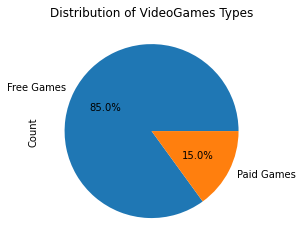

In [340]:
#Generating a pie plot from the paid and free categories
plt.pie(x=[len(free_games),len(paid_games)],autopct='%1.1f%%',labels=["Free Games","Paid Games"])
plt.title("Distribution of VideoGames Types")
plt.ylabel("Count")
plt.savefig(path_figures+"videogame_types_pie.png",bbox_inches='tight')

Observing the previous plot, and contrary from Google Data, 15% of the top games are paid.

In [341]:
average_price = apple_hundred_df["Price"].mean()
print("The average price that the people are willing to pay, considering the free ones, are: "+str(average_price))

The average price that the people are willing to pay, considering the free ones, are: 0.2584999999999999


In [342]:
max_price = apple_hundred_df["Price"].max()
print("The most expensive app is: "+str(max_price))

The most expensive app is: 6.99


In [343]:
count_less = apple_hundred_df.loc[apple_hundred_df["Price"]<average_price,:]
print("There are "+str(len(count_less))+" games that are free")

There are 85 games that are free


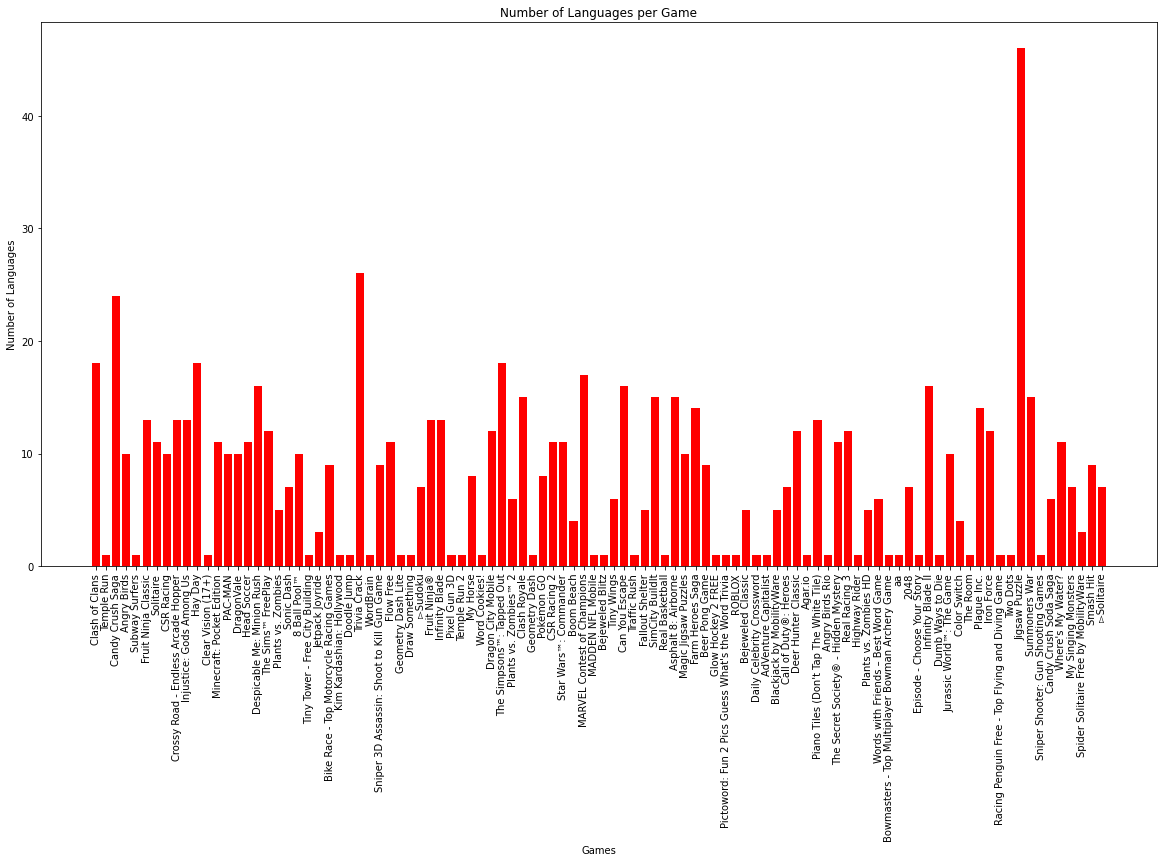

In [344]:
#Plotting Language number per countries
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
plt.bar(apple_hundred_df["App"],apple_hundred_df["lang.num"],color='r')
plt.xlabel("Games")
plt.ylabel("Number of Languages")
plt.title("Number of Languages per Game")
plt.savefig(path_figures+"lang_pergame.png",bbox_inches='tight')

In [345]:
print("The average languages for the app is: "+str(apple_hundred_df["lang.num"].mean()))

The average languages for the app is: 7.89


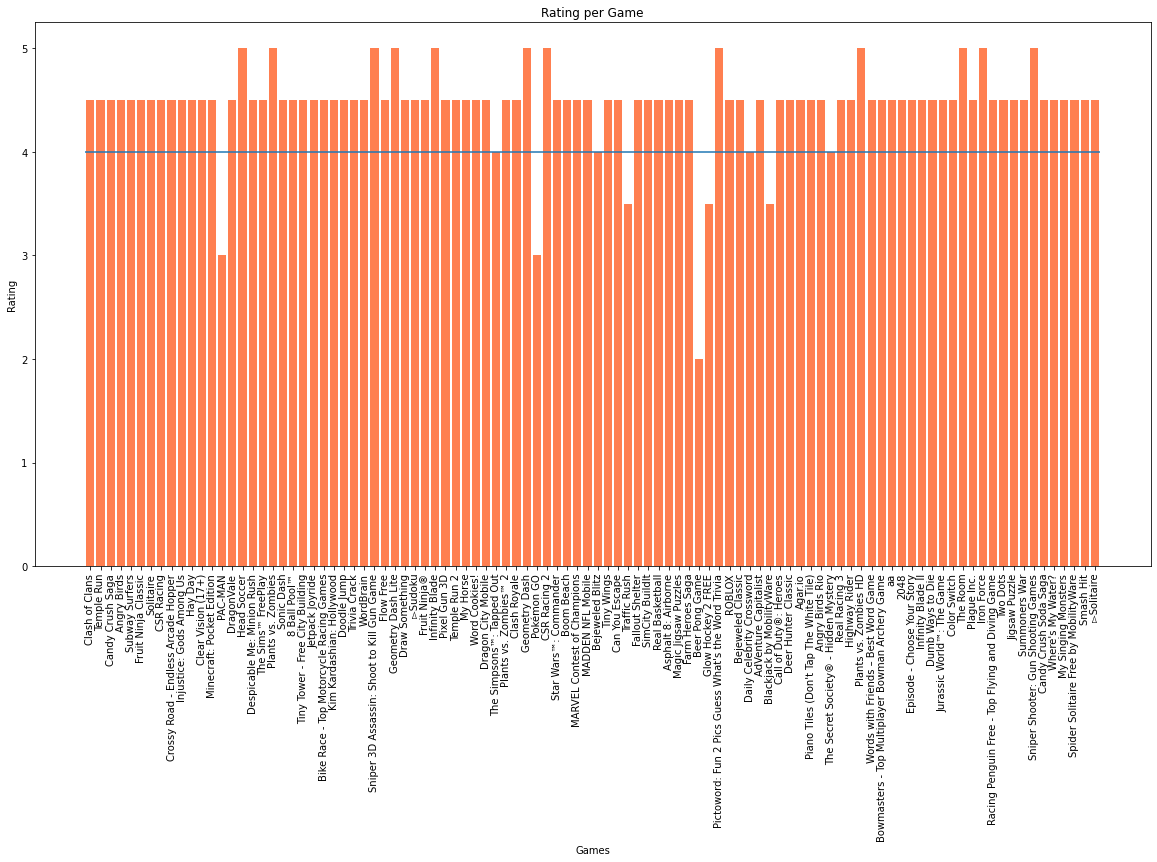

In [346]:
#Plotting the rating per game
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
plt.bar(apple_hundred_df["App"],apple_hundred_df["Rating"],color='coral')
plt.hlines(4,-.5,99.5)
plt.xlabel("Games")
plt.ylabel("Rating")
plt.title("Rating per Game")
plt.savefig(path_figures+"rating_pergame_apple.png",bbox_inches='tight')

In [347]:
print("The user rating mean is: " +str(apple_hundred_df["Rating"].mean()))

The user rating mean is: 4.455


0.040552720541389996


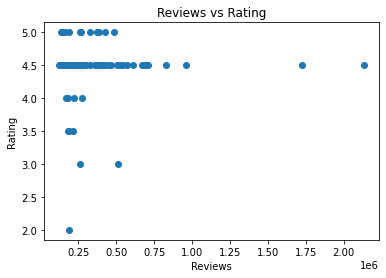

In [348]:
#Finding a correlation between the rating count total and the user rating
plt.scatter(apple_hundred_df["Reviews"],apple_hundred_df["Rating"])
print(st.pearsonr(apple_hundred_df["Reviews"],apple_hundred_df["Rating"])[0])
plt.title("Reviews vs Rating")
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.savefig(path_figures+"correlation_rct_userrat.png",bbox_inches='tight')

It seems that Reviews and Rating are not totally related.

0.15937969451635836


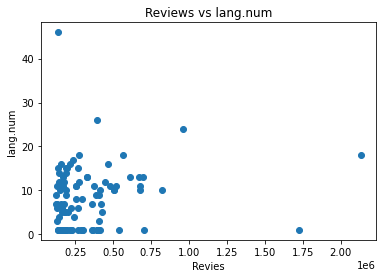

In [349]:
plt.scatter(apple_hundred_df["Reviews"],apple_hundred_df["lang.num"])
print(st.pearsonr(apple_hundred_df["Reviews"],apple_hundred_df["lang.num"])[0])
plt.title("Reviews vs lang.num")
plt.xlabel("Revies")
plt.ylabel("lang.num")
plt.savefig(path_figures+"correlation_rct_langnum.png",bbox_inches='tight')

It seems that there is a low correlation, yet it exists. The correlation coefficient is: 0.1593

In [350]:
# Merging my App Store and Play Store Data Frame
merged_playstore_games = pd.merge(
    google_playstore_games,apple_store_games, on = "App", how ="inner", suffixes=("_Android","_IOS"))
merged_playstore_games = merged_playstore_games[["App","Rating_Android","Reviews_Android","Size_Android","Installs","Type",
                       "Price_Android","Content Rating_Android","Genres_Android","Rating_IOS",
                        "Reviews_IOS","Size_IOS","Price_IOS","Content Rating_IOS","Genres_IOS"]]
merged_playstore_games.head(25)

,App,Rating_Android,Reviews_Android,Size_Android,Installs,Type,Price_Android,Content Rating_Android,Genres_Android,Rating_IOS,Reviews_IOS,Size_IOS,Price_IOS,Content Rating_IOS,Genres_IOS
0,Subway Surfers,4.500000,27722264,76M,1000000000,Free,0.000000,Everyone 10+,Arcade,4.500000,706110,156038144,0.000000,Everyone 10+,Games
1,Candy Crush Saga,4.400000,22426677,74M,500000000,Free,0.000000,Everyone,Casual,4.500000,961794,222846976,0.000000,Everyone,Games
2,My Talking Tom,4.500000,14891223,Varies with device,500000000,Free,0.000000,Everyone,Casual,4.500000,123859,255747072,0.000000,Everyone,Games
3,Temple Run 2,4.300000,8118609,62M,500000000,Free,0.000000,Everyone,Action & Adventure,4.500000,295211,158025728,0.000000,Everyone 10+,Games
4,Pou,4.300000,10485308,24M,500000000,Free,0.000000,Everyone,Casual,4.500000,3783,40968192,0.000000,Everyone,Games
5,Hungry Shark Evolution,4.500000,6074334,100M,100000000,Free,0.000000,Teen,Arcade,4.500000,83784,320535552,0.000000,Teen,Games
6,Super Mario Run,3.700000,1221896,70M,100000000,Free,0.000000,Everyone,Action & Adventure,2.500000,87958,194245632,0.000000,Everyone,Games
7,Trivia Crack,4.500000,6427773,95M,100000000,Free,0.000000,Everyone,Trivia,4.500000,393469,265484288,0.000000,Everyone,Games
8,Pokémon GO,4.100000,10424925,85M,100000000,Free,0.000000,Everyone,Action & Adventure,3.000000,257627,290762752,0.000000,Everyone 10+,Games
9,ROBLOX,4.500000,4447388,67M,100000000,Free,0.000000,Everyone 10+,Action & Adventure,4.500000,183621,115178496,0.000000,Teen,Games


In [351]:
hybrid_games = merged_playstore_games["App"].tolist()
number_of_hybrid_games = merged_playstore_games["App"].count()
print(f"There are {number_of_hybrid_games} available games in both Play Stores - Tech Stacks (IOS & Android).")

There are 107 available games in both Play Stores - Tech Stacks (IOS & Android).


In [352]:
only_in_google_playstore = google_playstore_games
for x in hybrid_games:
    only_in_google_playstore = only_in_google_playstore.loc[only_in_google_playstore["App"] != x,:]
number_of_google_games = only_in_google_playstore["App"].count()
print(f"There are {number_of_google_games} available games that you can only find in Google Play Store (Android).")

There are 806 available games that you can only find in Google Play Store (Android).


In [353]:
only_in_apple_store = apple_store_games
for y in hybrid_games:
    only_in_apple_store = only_in_apple_store.loc[only_in_apple_store["App"] != y,:]
number_of_apple_games = only_in_apple_store["App"].count()
print(f"There are {number_of_apple_games} available games that you can only find in the App Store (IOS).")

There are 3753 available games that you can only find in the App Store (IOS).


In [354]:
apps_per_tech_stack = pd.DataFrame({"Number of Apps By Tech Stack":[number_of_apple_games,number_of_google_games,
                                                                    number_of_hybrid_games]})
apps_per_tech_stack = apps_per_tech_stack.rename(index = {0:"IOS",1:"Android",2:"Hybrid"})
apps_per_tech_stack

,Number of Apps By Tech Stack
IOS,3753
Android,806
Hybrid,107


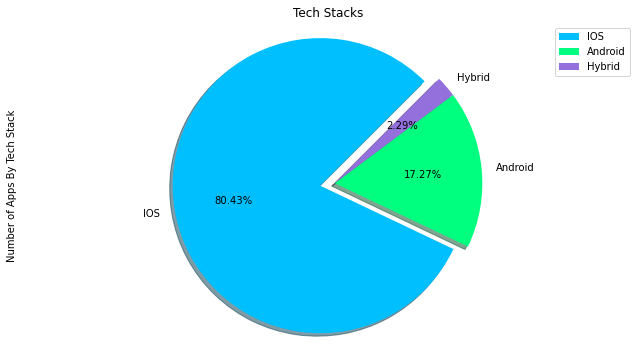

In [355]:
explode = (0.1,0,0)

apps_per_tech_stack_plot = apps_per_tech_stack.plot(kind = "pie", y ="Number of Apps By Tech Stack", 
                                                    title ="Tech Stacks",autopct = "%.2f%%",
                              colors = ['deepskyblue', 'springgreen',"mediumpurple"],shadow=True,startangle = 45, 
                                                    explode = explode, figsize=(11,6))
plt.axis("equal")
plt.savefig("Outputs_RMS/Number_of_Apps_By_Tech_Stack")
plt.show()


# Top 10 More Sold Apps (by Reviews)

In [356]:
apple_store_games = apple_store_games.sort_values(by=["Reviews"], ascending = False)
i_apple_store_games = apple_store_games.set_index("App")
i_apple_store_games

,index,Index,ID,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
App,,,,,,,,,,,,,,,,,
Clash of Clans,1346,1561,529479190,116476928,USD,0.000000,2130805,579,4.500000,4.500000,9.24.12,Everyone 10+,Games,38,5,18,1
Temple Run,707,810,420009108,65921024,USD,0.000000,1724546,3842,4.500000,4.000000,1.6.2,Everyone 10+,Games,40,5,1,1
Candy Crush Saga,1493,1731,553834731,222846976,USD,0.000000,961794,2453,4.500000,4.500000,1.101.0,Everyone,Games,43,5,24,1
Angry Birds,275,310,343200656,175966208,USD,0.000000,824451,107,4.500000,3.000000,7.4.0,Everyone,Games,38,0,10,1
Subway Surfers,1246,1450,512939461,156038144,USD,0.000000,706110,97,4.500000,4.000000,1.72.1,Everyone 10+,Games,38,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
暗黑屠魔者2（唉哟-还不错哦）,4846,6272,1062827816,710589440,USD,0.990000,0,0,0.000000,0.000000,1.3.1,Mature 17+,Games,38,5,2,1
激ムズ！にゃんコプター,4842,6265,1062784298,99588096,USD,0.000000,0,0,0.000000,0.000000,1.0.0,Everyone 10+,Games,37,3,1,1
妹型杀器,4839,6261,1062764988,159130624,USD,0.000000,0,0,0.000000,0.000000,1.0.5,Everyone 10+,Games,40,5,1,1


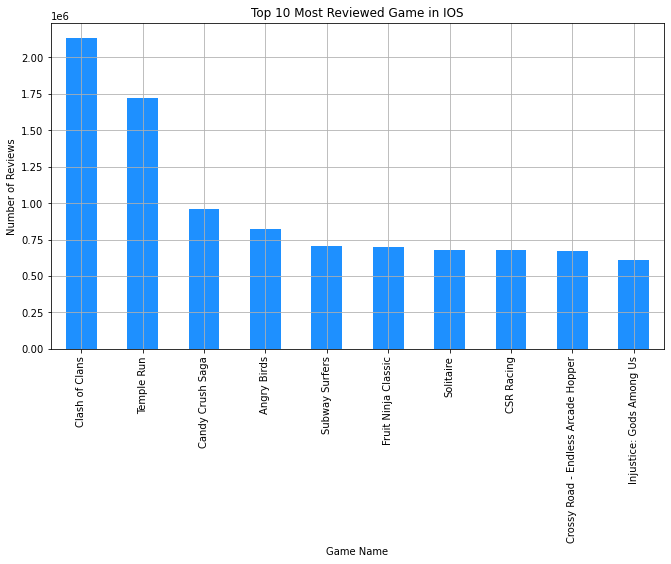

In [357]:
i_apple_store_games["Reviews"].head(10).plot(kind="bar", figsize=(11,6),width = 0.5,
                                             align="center",facecolor = "dodgerblue",rot=90)

plt.title("Top 10 Most Reviewed Game in IOS")
plt.xlabel("Game Name")
plt.ylabel("Number of Reviews")

plt.grid()
plt.savefig("Outputs_RMS/Top_Ten_Most_IOS_Reviewed_Games")
plt.show()


In [358]:
google_playstore_games["Reviews"] = google_playstore_games["Reviews"].astype(int)
google_playstore_games = google_playstore_games.sort_values(by = ["Reviews"], ascending = False)
i_google_playstore_games = google_playstore_games.set_index("App")
i_google_playstore_games 

,index,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,,
Clash of Clans,1670,GAME,4.600000,44891723,98M,100000000,Free,0.000000,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
Subway Surfers,1654,GAME,4.500000,27722264,76M,1000000000,Free,0.000000,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
Clash Royale,1660,GAME,4.600000,23133508,97M,100000000,Free,0.000000,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
Candy Crush Saga,1655,GAME,4.400000,22426677,74M,500000000,Free,0.000000,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
My Talking Tom,1722,GAME,4.500000,14891223,Varies with device,500000000,Free,0.000000,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Galaxian(FC),10270,GAME,4.500000,2,7.8M,100,Paid,1.990000,Everyone,Arcade,"November 13, 2015",1.0,2.3 and up
Ra Ga Ba,5917,GAME,5.000000,2,20M,1,Paid,1.490000,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
Mu.F.O.,10697,GAME,5.000000,2,16M,1,Paid,0.990000,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


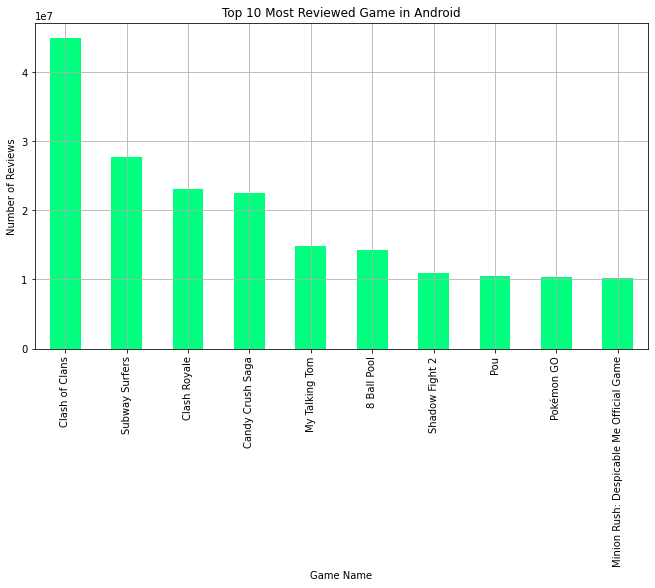

In [359]:
i_google_playstore_games["Reviews"].head(10).plot(kind="bar", figsize=(11,6),width = 0.5,
                                             align="center", facecolor = "springgreen" ,rot=90)

plt.title("Top 10 Most Reviewed Game in Android")
plt.xlabel("Game Name")
plt.ylabel("Number of Reviews")

plt.grid()
plt.savefig("Outputs_RMS/Top_Ten_Most_Android_Reviewed_Games")
plt.show()


In [360]:
merged_playstore_games = merged_playstore_games.sort_values(by=["Reviews_Android","Reviews_IOS"], ascending = False)
i_merged_playstore_games = merged_playstore_games.set_index("App")
i_merged_playstore_games.head(10)

,Rating_Android,Reviews_Android,Size_Android,Installs,Type,Price_Android,Content Rating_Android,Genres_Android,Rating_IOS,Reviews_IOS,Size_IOS,Price_IOS,Content Rating_IOS,Genres_IOS
App,,,,,,,,,,,,,,
Clash of Clans,4.600000,44891723,98M,100000000,Free,0.000000,Everyone 10+,Strategy,4.500000,2130805,116476928,0.000000,Everyone 10+,Games
Subway Surfers,4.500000,27722264,76M,1000000000,Free,0.000000,Everyone 10+,Arcade,4.500000,706110,156038144,0.000000,Everyone 10+,Games
Clash Royale,4.600000,23133508,97M,100000000,Free,0.000000,Everyone 10+,Strategy,4.500000,266921,114408448,0.000000,Everyone 10+,Games
Candy Crush Saga,4.400000,22426677,74M,500000000,Free,0.000000,Everyone,Casual,4.500000,961794,222846976,0.000000,Everyone,Games
My Talking Tom,4.500000,14891223,Varies with device,500000000,Free,0.000000,Everyone,Casual,4.500000,123859,255747072,0.000000,Everyone,Games
Shadow Fight 2,4.600000,10979062,88M,100000000,Free,0.000000,Everyone 10+,Action & Adventure,4.500000,99206,144713728,0.000000,Teen,Games
Pou,4.300000,10485308,24M,500000000,Free,0.000000,Everyone,Casual,4.500000,3783,40968192,0.000000,Everyone,Games
Pokémon GO,4.100000,10424925,85M,100000000,Free,0.000000,Everyone,Action & Adventure,3.000000,257627,290762752,0.000000,Everyone 10+,Games
My Talking Angela,4.500000,9881829,99M,100000000,Free,0.000000,Everyone,Casual,4.500000,54549,398783488,0.000000,Everyone,Games


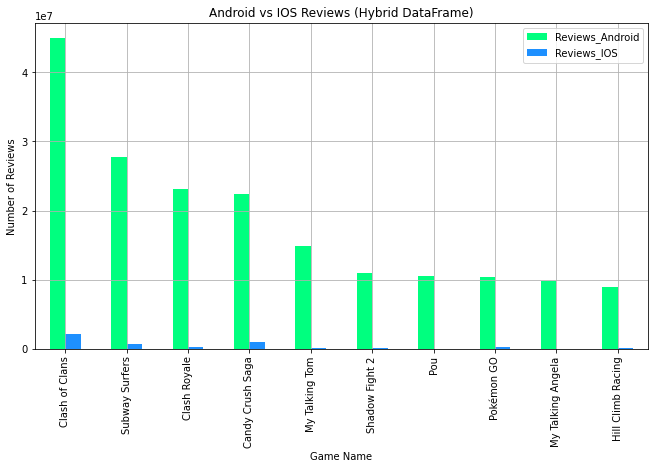

In [361]:
i_merged_playstore_games[["Reviews_Android","Reviews_IOS"]].head(10).plot(kind="bar", figsize=(11,6),width = 0.5,
                                             align="center", color = ["springgreen","dodgerblue"],rot=90)

plt.title("Android vs IOS Reviews (Hybrid DataFrame)")
plt.xlabel("Game Name")
plt.ylabel("Number of Reviews")

plt.grid()
plt.savefig("Outputs_RMS/IOS_Reviews_vs_Android_Reviews")
plt.show()

# Top 10 More Sold Apps (by Installations) - Hypotesis

In [362]:
# Relationship between Downloads and Reviews
google_playstore_games["Reviews"] = [float(x) for x in google_playstore_games["Reviews"]]
google_playstore_games_by_installs = google_playstore_games.groupby("Installs")
google_playstore_games_by_installs_x_reviews = google_playstore_games_by_installs["Reviews"].mean()
google_playstore_games_by_installs_x_reviews_df = pd.DataFrame(google_playstore_games_by_installs_x_reviews)
google_playstore_games_by_installs_x_reviews_df

,Reviews
Installs,
1,2.000000
5,7.000000
10,5.333333
50,8.800000
100,12.785714
500,21.000000
1000,66.606061
5000,106.941176
10000,620.515625


In [363]:
# Relationship between Downloads and Reviews
google_playstore_games_by_installs_x_reviews_index = google_playstore_games_by_installs_x_reviews_df.index.values.tolist()
google_playstore_games_by_installs_x_reviews_serie = pd.Series(google_playstore_games_by_installs_x_reviews_index)

In [364]:
# Relationship between Downloads and Reviews
google_playstore_games["Installs"].unique()

array([ 100000000, 1000000000,  500000000,   50000000,   10000000,
          5000000,    1000000,     500000,     100000,      50000,
            10000,       5000,       1000,        500,        100,
               50,         10,          5,          1])

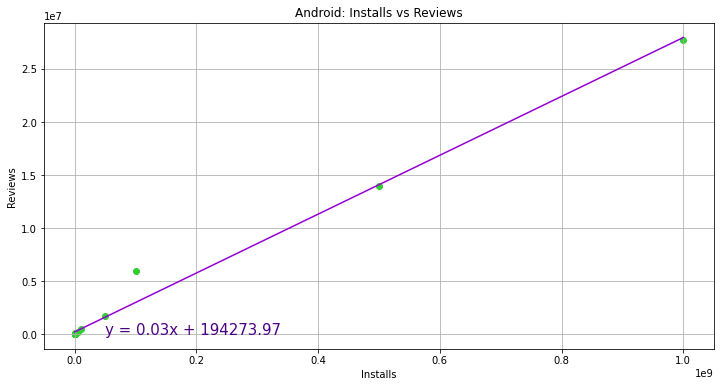

In [365]:
# Relationship between Downloads and Reviews
plt.figure(figsize=(12,6))
x_values = google_playstore_games_by_installs_x_reviews_serie
y_values = google_playstore_games_by_installs_x_reviews
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
y_line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.scatter(x_values,y_values, color="limegreen")
plt.plot(x_values,regress_values,color="darkviolet")

plt.title("Android: Installs vs Reviews")
plt.xlabel("Installs")
plt.ylabel("Reviews")
plt.annotate(y_line_eq,(50000000,40),fontsize=15, color="indigo")

plt.grid()
plt.savefig("Outputs_RMS/Android_Regression_Line_Installs_vs_Reviews")
plt.show()

In [366]:
x_line_eq = "x = (y - "+str(round(intercept,2))+") / "+str(round(slope,2))
print(f"Actual Equation:{y_line_eq}")
print(f"Clear Equation:{x_line_eq}")


Actual Equation:y = 0.03x + 194273.97
Clear Equation:x = (y - 194273.97) / 0.03


In [367]:
apple_store_games["Installs"] = (apple_store_games["Reviews"] - round(intercept,2))/round(slope,2)
apple_store_games = apple_store_games.sort_values(by=["Installs"], ascending = False)
tt_apple_store_games = apple_store_games.head(10)
tt_apple_store_games

,index,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Installs
277,1346,1561,529479190,Clash of Clans,116476928,USD,0.000000,2130805,579,4.500000,4.500000,9.24.12,Everyone 10+,Games,38,5,18,1,64551034.333333
278,707,810,420009108,Temple Run,65921024,USD,0.000000,1724546,3842,4.500000,4.000000,1.6.2,Everyone 10+,Games,40,5,1,1,51009067.666667
279,1493,1731,553834731,Candy Crush Saga,222846976,USD,0.000000,961794,2453,4.500000,4.500000,1.101.0,Everyone,Games,43,5,24,1,25584001.000000
280,275,310,343200656,Angry Birds,175966208,USD,0.000000,824451,107,4.500000,3.000000,7.4.0,Everyone,Games,38,0,10,1,21005901.000000
281,1246,1450,512939461,Subway Surfers,156038144,USD,0.000000,706110,97,4.500000,4.000000,1.72.1,Everyone 10+,Games,38,5,1,1,17061201.000000
282,348,393,362949845,Fruit Ninja Classic,104590336,USD,1.990000,698516,132,4.500000,4.000000,2.3.9,Everyone,Games,38,5,13,1,16808067.666667
283,343,386,359917414,Solitaire,101943296,USD,0.000000,679055,9673,4.500000,4.500000,4.11.2,Everyone,Games,38,4,11,1,16159367.666667
284,990,1143,469369175,CSR Racing,524803072,USD,0.000000,677247,2029,4.500000,4.500000,4.0.1,Everyone,Games,37,5,10,1,16099101.000000
285,3042,3637,924373886,Crossy Road - Endless Arcade Hopper,165471232,USD,0.000000,669079,1087,4.500000,4.500000,1.5.4,Everyone 10+,Games,38,5,13,1,15826834.333333
286,1634,1895,575658129,Injustice: Gods Among Us,1829599232,USD,0.000000,612532,410,4.500000,4.500000,2.15.1,Teen,Games,39,5,13,1,13941934.333333


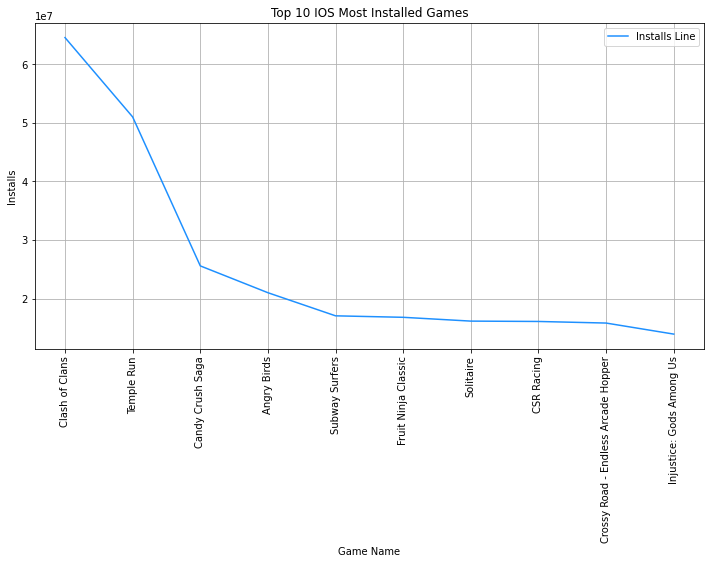

In [368]:
plt.figure(figsize=(12,6))
plt.plot(tt_apple_store_games["App"],tt_apple_store_games["Installs"], color="dodgerblue",label="Installs Line")
plt.title("Top 10 IOS Most Installed Games")
plt.ylabel("Installs")
plt.xlabel("Game Name")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.grid()
plt.savefig("Outputs_RMS/Top_Ten_Most_IOS_Installed_Games")
plt.show()

In [369]:
google_playstore_games = google_playstore_games.sort_values(by=["Installs"], ascending = False)
tt_google_playstore_games = google_playstore_games.head(10)
tt_google_playstore_games

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,1654,Subway Surfers,GAME,4.500000,27722264.000000,76M,1000000000,Free,0.000000,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
8,1661,Temple Run 2,GAME,4.300000,8118609.000000,62M,500000000,Free,0.000000,Everyone,Action & Adventure,"July 5, 2018",1.49.1,4.0 and up
2,1655,Candy Crush Saga,GAME,4.400000,22426677.000000,74M,500000000,Free,0.000000,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
55,1722,My Talking Tom,GAME,4.500000,14891223.000000,Varies with device,500000000,Free,0.000000,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
9,1662,Pou,GAME,4.300000,10485308.000000,24M,500000000,Free,0.000000,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
481,5950,Banana Kong,GAME,4.400000,3452530.000000,68M,100000000,Free,0.000000,Everyone,Action & Adventure,"February 7, 2018",1.9.6.6,4.0.3 and up
228,3916,Lep's World 2 🍀🍀,GAME,4.300000,798522.000000,57M,100000000,Free,0.000000,Everyone 10+,Arcade,"June 7, 2018",1.9.8.0,4.1 and up
248,4043,Vector,GAME,4.400000,3058687.000000,89M,100000000,Free,0.000000,Everyone 10+,Arcade,"July 18, 2016",1.2.0,4.0 and up
47,1707,Cooking Fever,GAME,4.500000,3197865.000000,82M,100000000,Free,0.000000,Everyone,Arcade,"July 12, 2018",2.8.0,4.0.3 and up
194,1957,Bus Rush: Subway Edition,GAME,4.100000,753043.000000,57M,100000000,Free,0.000000,Teen,Action & Adventure,"August 1, 2018",1.15.2,4.0.3 and up


/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0, flags=flags)


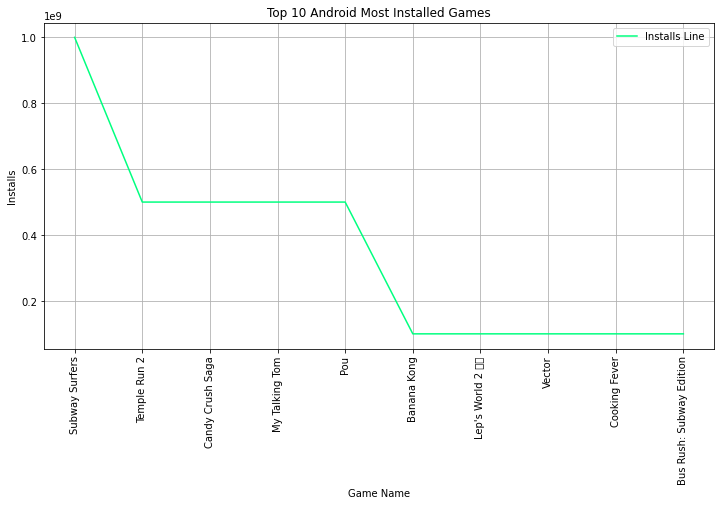

In [370]:
plt.figure(figsize=(12,6))
plt.plot(tt_google_playstore_games["App"],tt_google_playstore_games["Installs"], color="springgreen",label="Installs Line")
plt.title("Top 10 Android Most Installed Games")
plt.ylabel("Installs")
plt.xlabel("Game Name")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.grid()
plt.savefig("Outputs_RMS/Top_Ten_Most_Android_Installed_Games")
plt.show()

# Paid Apps Costs Differences

In [371]:
paid_apple_store_games = apple_store_games.loc[apple_store_games["Price"]!=0.00,:]
paid_apple_store_games

,index,Index,ID,App,Size,Currency,Price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,Content Rating,Genres,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Installs
282,348,393,362949845,Fruit Ninja Classic,104590336,USD,1.990000,698516,132,4.500000,4.000000,2.3.9,Everyone,Games,38,5,13,1,16808067.666667
288,1182,1378,500116670,Clear Vision (17+),37879808,USD,0.990000,541693,69225,4.500000,4.500000,1.1.3,Mature 17+,Games,43,5,1,1,11580634.333333
289,1052,1230,479516143,Minecraft: Pocket Edition,147787776,USD,6.990000,522012,1148,4.500000,4.500000,1.1,Everyone 10+,Games,37,1,11,1,10924601.000000
1,302,341,350642635,Plants vs. Zombies,105379840,USD,0.990000,426463,680,5.000000,4.000000,1.9.13,Everyone 10+,Games,38,0,5,1,7739634.333333
299,109,122,307727765,Doodle Jump,48741376,USD,0.990000,395261,88,4.500000,4.500000,3.17.6,Everyone,Games,37,0,1,1,6699567.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,7165,10989,1181855507,開園ピクセル牧場,192621568,USD,4.990000,0,0,0.000000,0.000000,1.0.6,Everyone,Games,38,5,1,1,-6475799.000000
3855,7178,11033,1185209084,Saloons Unleashed,327731200,USD,0.990000,0,0,0.000000,0.000000,1.1,Everyone,Games,37,5,1,1,-6475799.000000
3856,7181,11038,1185428381,剑倚手游,178160640,USD,0.990000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,40,5,0,1,-6475799.000000
3858,7185,11043,1185777521,问仙奇遇-新玩法新套装嗨到爆,208026624,USD,0.990000,0,0,0.000000,0.000000,1.0,Everyone 10+,Games,38,5,1,1,-6475799.000000


In [372]:
paid_google_playstore_games = google_playstore_games.loc[google_playstore_games["Price"]!=0.00,:]
paid_google_playstore_games

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
244,4034,Hitman Sniper,GAME,4.600000,408292.000000,29M,10000000,Paid,0.990000,Mature 17+,Action & Adventure,"July 12, 2018",1.7.110758,4.1 and up
347,4842,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,4.300000,13604.000000,96M,1000000,Paid,0.990000,Teen,Action & Adventure,"June 26, 2018",2.4.4,2.3 and up
430,5631,Five Nights at Freddy's,GAME,4.600000,100805.000000,50M,1000000,Paid,2.990000,Teen,Action & Adventure,"December 2, 2014",1.85,2.3 and up
889,10682,Fruit Ninja Classic,GAME,4.300000,85468.000000,36M,1000000,Paid,0.990000,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
726,8804,DraStic DS Emulator,GAME,4.600000,87766.000000,12M,1000000,Paid,4.990000,Everyone,Action & Adventure,"July 19, 2016",r2.5.0.3a,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,8787,Dr. Splorchy Presents Space Heroes,GAME,4.600000,18.000000,31M,100,Paid,4.990000,Mature 17+,Action & Adventure,"July 23, 2018",1.0,7.0 and up
740,9056,Santa's Monster Shootout DX,GAME,5.000000,4.000000,33M,50,Paid,1.990000,Teen,Action & Adventure,"August 15, 2013",1.05,2.2 and up
600,7466,211:CK,GAME,5.000000,8.000000,38M,10,Paid,0.990000,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
479,5917,Ra Ga Ba,GAME,5.000000,2.000000,20M,1,Paid,1.490000,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up


In [373]:
ios_costs = paid_apple_store_games["Price"].mean()
android_costs = paid_google_playstore_games["Price"].mean()

In [374]:
paid_apps_costs = pd.DataFrame({"Description":["IOS Average Paid Apps Cost","Android Average Paid Apps Cost"],
                                "Average Price":[round(ios_costs,2),round(android_costs,2)]})
paid_apps_costs = paid_apps_costs.set_index("Description")

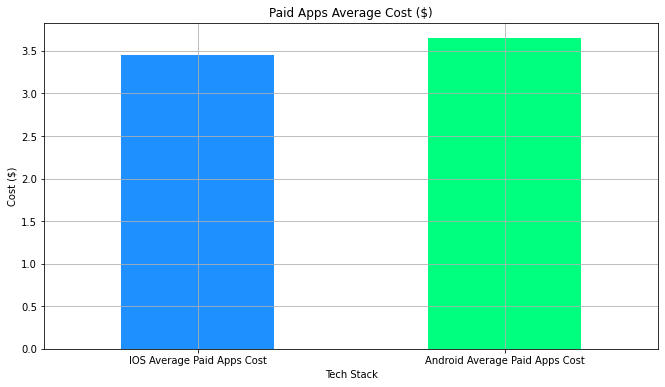

----------------------------------
A P P  S T O R E
----------------------------------
The average cost for paid apps in the app store is of $3.45
 
 
----------------------------------
G O O G L E  P L A Y  S T O R E
----------------------------------
The average cost for paid apps in the google play store is of $3.65


In [375]:
paid_apps_costs.plot(kind="bar", figsize=(11,6),width = 0.5,align="center", color = [["dodgerblue","springgreen"]],
                     rot=0, legend = None)

plt.title("Paid Apps Average Cost ($)")
plt.xlabel("Tech Stack")
plt.ylabel("Cost ($)")
plt.grid()
plt.savefig("Outputs_RMS/Paid_Apps_Average_Cost_Android_vs_IOS")
plt.show()

print("----------------------------------")
print("A P P  S T O R E")
print("----------------------------------")
print(f"The average cost for paid apps in the app store is of ${round(ios_costs,2)}")
print(" ")
print(" ")
print("----------------------------------")
print("G O O G L E  P L A Y  S T O R E")
print("----------------------------------")
print(f"The average cost for paid apps in the google play store is of ${round(android_costs,2)}")

In [376]:
# Only Paid Apps in both DataFrames (Hybrid Games)
paid_hybrid_apps = merged_playstore_games.loc[(merged_playstore_games["Price_Android"]!=0.00) &
                                             (merged_playstore_games["Price_IOS"]!=0.00),:]
paid_hybrid_android_price_mean = paid_hybrid_apps["Price_Android"].mean()
paid_hybrid_ios_price_mean = paid_hybrid_apps["Price_IOS"].mean()

paid_hybrid_apps_costs = pd.DataFrame({"Description":["IOS Average Hybrid Paid Apps Cost",
                                                      "Android Hybrid Average Paid Apps Cost"],
                                "Average Price":[round(paid_hybrid_ios_price_mean,2),round(paid_hybrid_android_price_mean,2)]})

paid_hybrid_apps_costs = paid_hybrid_apps_costs.set_index("Description")
paid_hybrid_apps_costs 

,Average Price
Description,
IOS Average Hybrid Paid Apps Cost,3.920000
Android Hybrid Average Paid Apps Cost,3.490000


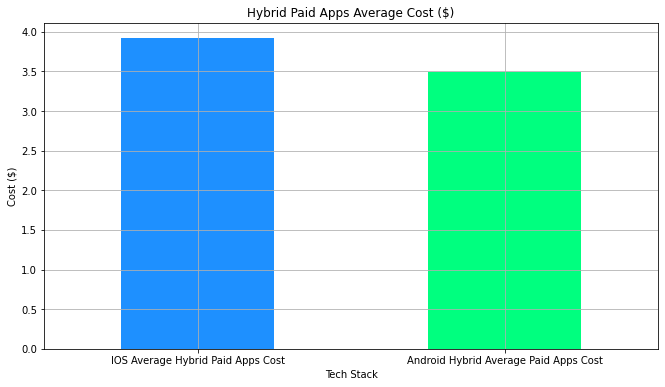

In [377]:
paid_hybrid_apps_costs.plot(kind="bar", figsize=(11,6),width = 0.5,align="center", color = [["dodgerblue","springgreen"]],
                     rot=0, legend = None)

plt.title("Hybrid Paid Apps Average Cost ($)")
plt.xlabel("Tech Stack")
plt.ylabel("Cost ($)")
plt.grid()
plt.savefig("Outputs_RMS/Paid_Hybrid_Apps_Average_Cost_Android_vs_IOS")
plt.show()


In [378]:
# Average Price for Paid and Non Paid Apps in both DataFrames (Hybrid Games)
hybrid_android_price_mean = merged_playstore_games["Price_Android"].mean()
hybrid_ios_price_mean = merged_playstore_games["Price_IOS"].mean()

hybrid_apps_costs = pd.DataFrame({"Description":["IOS Average Hybrid Apps Cost",
                                                      "Android Hybrid Average Apps Cost"],
                                "Average Price":[round(hybrid_ios_price_mean,2),round(hybrid_android_price_mean,2)]})

hybrid_apps_costs = hybrid_apps_costs.set_index("Description")
hybrid_apps_costs 

,Average Price
Description,
IOS Average Hybrid Apps Cost,0.700000
Android Hybrid Average Apps Cost,0.460000


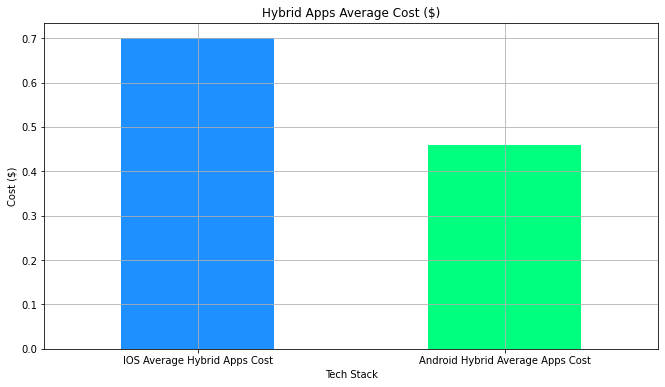

In [379]:
hybrid_apps_costs.plot(kind="bar", figsize=(11,6),width = 0.5,align="center", color = [["dodgerblue","springgreen"]],
                     rot=0, legend = None)

plt.title("Hybrid Apps Average Cost ($)")
plt.xlabel("Tech Stack")
plt.ylabel("Cost ($)")
plt.grid()
plt.savefig("Outputs_RMS/Hybrid_Apps_Average_Cost_Android_vs_IOS")
plt.show()


In [380]:
android_hybrid_apps = merged_playstore_games.loc[(merged_playstore_games["Price_Android"]==0.00) &
                                             (merged_playstore_games["Price_IOS"]!=0.00),:]
len_android_hybrid_apps =  android_hybrid_apps["App"].count()
print(f"There are {len_android_hybrid_apps} that are free in Google Play Store, that cost in App Store")
android_hybrid_apps

There are 10 that are free in Google Play Store, that cost in App Store


,App,Rating_Android,Reviews_Android,Size_Android,Installs,Type,Price_Android,Content Rating_Android,Genres_Android,Rating_IOS,Reviews_IOS,Size_IOS,Price_IOS,Content Rating_IOS,Genres_IOS
41,Red Ball 4,4.400000,1432447,59M,50000000,Free,0.000000,Everyone,Arcade,4.500000,9818,105723904,0.990000,Everyone,Games
46,Earn to Die 2,4.600000,1327265,99M,50000000,Free,0.000000,Teen,Racing,4.500000,3072,102755328,1.990000,Teen,Games
39,Doodle Jump,4.300000,1083571,Varies with device,50000000,Free,0.000000,Everyone,Arcade,4.500000,395261,48741376,0.990000,Everyone,Games
83,Cytus,4.700000,541732,20M,5000000,Free,0.000000,Everyone,Music,5.000000,7925,1560187904,1.990000,Everyone,Games
77,Alto's Adventure,4.600000,515657,63M,10000000,Free,0.000000,Everyone,Action & Adventure,4.500000,7824,128664576,4.990000,Everyone 10+,Games
73,Dragon Hills,4.500000,354373,66M,10000000,Free,0.000000,Everyone 10+,Action & Adventure,4.500000,5508,175003648,1.990000,Everyone 10+,Games
65,Can Knockdown 3,4.100000,349503,19M,10000000,Free,0.000000,Everyone,Arcade,4.500000,1135,151453696,1.990000,Everyone,Games
90,Mad Skills Motocross,4.000000,32522,44M,1000000,Free,0.000000,Everyone,Racing,4.500000,9341,16949248,0.990000,Teen,Games
92,Vikings: an Archer's Journey,4.500000,10256,39M,1000000,Free,0.000000,Everyone,Action & Adventure,4.500000,94,130727936,2.990000,Everyone 10+,Games
97,Get 'Em,4.100000,7904,21M,500000,Free,0.000000,Everyone 10+,Action & Adventure,4.000000,40,719419392,0.990000,Everyone 10+,Games


In [381]:
ios_hybrid_apps = merged_playstore_games.loc[(merged_playstore_games["Price_Android"]!=0.00) &
                                             (merged_playstore_games["Price_IOS"]==0.00),:]
len_ios_hybrid_apps =  ios_hybrid_apps["App"].count()
print(f"There are {len_ios_hybrid_apps} that are free in App Store, that cost in Google Play Store")
ios_hybrid_apps

There are 0 that are free in App Store, that cost in Google Play Store


,App,Rating_Android,Reviews_Android,Size_Android,Installs,Type,Price_Android,Content Rating_Android,Genres_Android,Rating_IOS,Reviews_IOS,Size_IOS,Price_IOS,Content Rating_IOS,Genres_IOS


# Which Content Rating is Better Depending of the Tech Stack?

In [382]:
cr_apple_store = pd.DataFrame(apple_store_games["Content Rating"].value_counts())
cr_apple_store

,Content Rating
Everyone,2077
Everyone 10+,865
Teen,741
Mature 17+,177


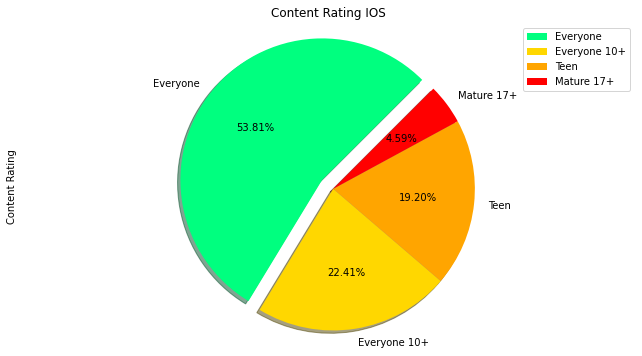

In [383]:
explode = (0.1,0,0,0)

cr_apple_store_plot = cr_apple_store.plot(kind = "pie", y ="Content Rating", 
                                                    title ="Content Rating IOS",autopct = "%.2f%%",
                              colors = ['springgreen', 'gold',"orange","red"],shadow=True,startangle = 45, 
                                                    explode = explode, figsize=(11,6))
plt.axis("equal")
plt.savefig("Outputs_RMS/IOS_Content_Rating")
plt.show()


In [384]:
cr_google_playstore = pd.DataFrame(google_playstore_games["Content Rating"].value_counts())
cr_google_playstore

,Content Rating
Everyone,455
Teen,288
Everyone 10+,105
Mature 17+,65


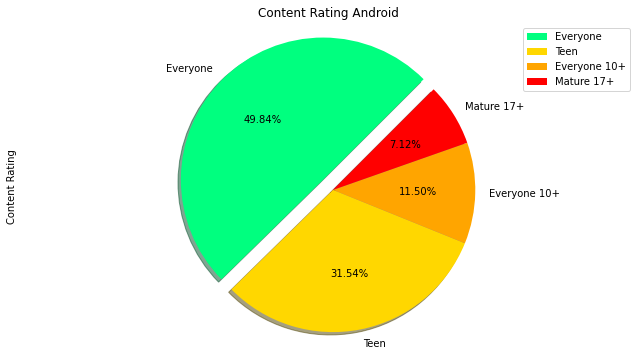

In [385]:
explode = (0.1,0,0,0)

cr_google_playstore_plot = cr_google_playstore.plot(kind = "pie", y ="Content Rating", 
                                                    title ="Content Rating Android",autopct = "%.2f%%",
                              colors = ['springgreen', 'gold',"orange","red"],shadow=True,startangle = 45, 
                                                    explode = explode, figsize=(11,6))
plt.axis("equal")
plt.savefig("Outputs_RMS/Android_Content_Rating")
plt.show()


# Most Important Genres in IOS & Android (Hybrid DF)

In [386]:
genres_hybrid_games = merged_playstore_games["Genres_Android"].value_counts()
genres_hybrid_games_df = pd.DataFrame(genres_hybrid_games)
genres_hybrid_games_df

,Genres_Android
Action & Adventure,38
Arcade,27
Racing,12
Casual,7
Simulation,5
Card,4
Puzzle,4
Music,2
Board,2
Strategy,2


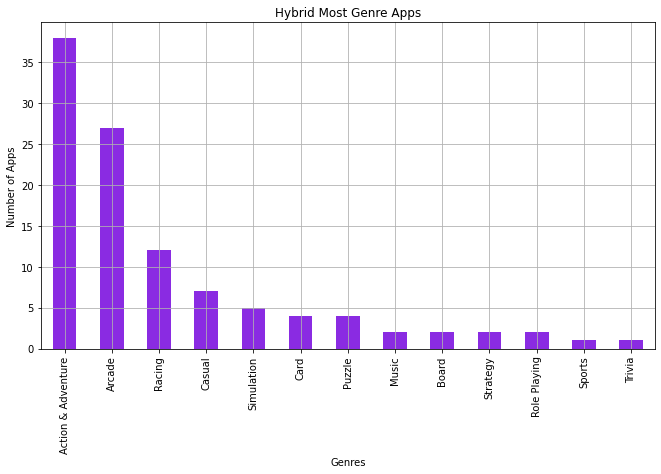

In [387]:
genres_hybrid_games_df.plot(kind="bar", figsize=(11,6),width = 0.5,align="center", color = "blueviolet",
                     rot=90, legend = None)

plt.title("Hybrid Most Genre Apps")
plt.xlabel("Genres")
plt.ylabel("Number of Apps")
plt.grid()
plt.savefig("Outputs_RMS/Hybrid_Most_Genre_Apps")
plt.show()


# Most successful game genres in different OS

In [388]:
pd.to_numeric(google_playstore_games['Installs'])
pd.set_option('float_format', '{:f}'.format)
google_playstore_games['Installs']

1      1000000000
8       500000000
2       500000000
55      500000000
9       500000000
          ...    
584            10
900            10
543             5
479             1
892             1
Name: Installs, Length: 913, dtype: int64

In [389]:
game_stat_avrg = google_playstore_games.groupby(['Genres']).mean()['Rating']
game_stat = google_playstore_games.groupby(['Genres']).sum()['Installs']
game_stat.sort_values(ascending=False)


Genres
Action & Adventure    4014732770
Arcade                3755077727
Casual                2139000000
Racing                1400246020
Puzzle                 603200000
Strategy               457300000
Sports                 316000000
Music                  170120000
Word                   169172500
Board                  162027000
Card                   152824500
Simulation             151100000
Casino                 130260100
Trivia                 128502100
Role Playing           109100000
Pretend Play            50000000
Creativity              10000000
Brain Games             10000000
Education                 100000
Name: Installs, dtype: int64

In [390]:
genres_count=google_playstore_games['Genres'].value_counts()
genres_percentage = (genres_count / len(google_playstore_games)) *100
genres_demographic = pd.DataFrame({'Count': genres_count, 'Percentage' : genres_percentage, 'Downloads': game_stat, 'Avrg Rating': game_stat_avrg})
genres_demographic['Percentage']=genres_demographic['Percentage'].astype(float)
genres_demographic = genres_demographic.sort_values(by=['Percentage'], ascending=False)
genres_demographic['Percentage']=genres_demographic['Percentage'].map('{:,.2f}%'.format)
genres_demographic

,Count,Percentage,Downloads,Avrg Rating
Action & Adventure,369,40.42%,4014732770,4.235772
Arcade,171,18.73%,3755077727,4.271930
Racing,86,9.42%,1400246020,4.150000
Card,44,4.82%,152824500,4.072727
Board,39,4.27%,162027000,4.279487
Casino,37,4.05%,130260100,4.286486
Trivia,28,3.07%,128502100,4.039286
Puzzle,24,2.63%,603200000,4.533333
Casual,23,2.52%,2139000000,4.469565
Word,22,2.41%,169172500,4.340909


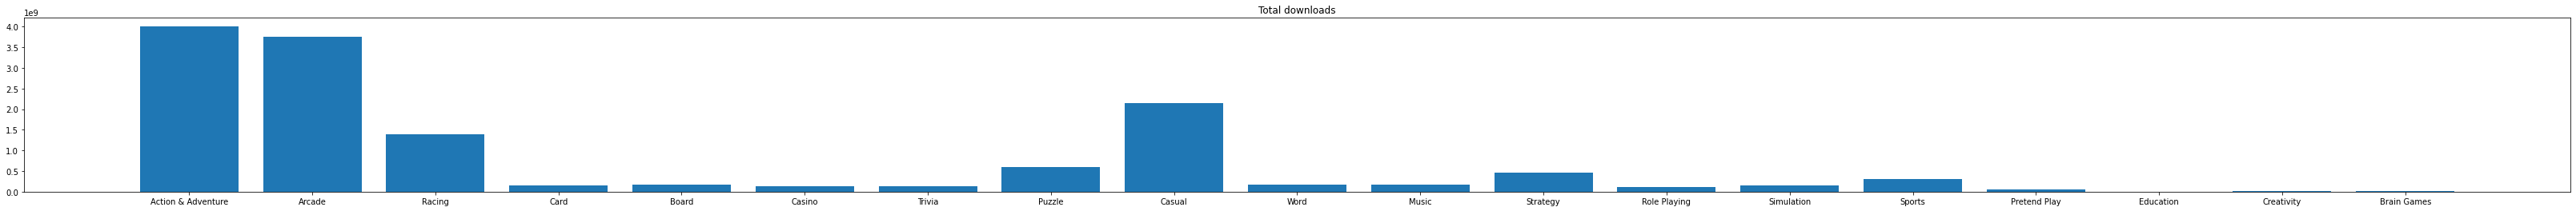

In [391]:
lit = genres_demographic.index.tolist()

bar = genres_demographic['Downloads']
plt.figure(figsize = (57,4))
plt.bar(lit, bar)
plt.title('Total downloads')
plt.show()

In [392]:
game_price = google_playstore_games['Type'].value_counts()
game_price_prctg = (game_price / len(google_playstore_games)) *100
game_price_rtng = google_playstore_games.groupby(['Type']).mean()['Rating']
game_price_downloads = google_playstore_games.groupby(['Type']).sum()['Installs']
game_price_averginstalls = google_playstore_games.groupby(['Type']).mean()['Installs']
game_type = pd.DataFrame({'Count': game_price, 'Percentage': game_price_prctg, 
                         'Installs type': game_price_downloads, 'Average rating': game_price_rtng, 
                          'Average Installs': game_price_averginstalls})
game_type['Percentage'] = game_type['Percentage'].map('{:,.2f}%'.format)
game_type.head()

,Count,Percentage,Installs type,Average rating,Average Installs
Type,,,,,
Free,837,91.68%,13907763455,4.236320,16616204.844683
Paid,76,8.32%,20999262,4.372368,276306.078947


In [393]:
# IOS data

ios_price_count =apple_store['Price'].value_counts()
ios_price_prctg = (ios_price_count / len(apple_store)) *100
ios_price_rtng = apple_store.groupby(['Price']).mean()['user_rating_ver']

ios_ratings = pd.DataFrame({'Count': ios_price_count, 'Percentage': ios_price_prctg, 
                         'Average rating': ios_price_rtng})
ios_ratings['Percentage'] = ios_ratings['Percentage'].map('{:,.2f}%'.format)
ios_ratings.head()

,Count,Percentage,Average rating
0.000000,4056,56.36%,3.059911
0.990000,728,10.12%,3.179945
1.990000,621,8.63%,3.578100
2.990000,683,9.49%,3.708638
3.990000,277,3.85%,3.528881


# Most successful bussines modeles for Mobile Games

In [394]:

#show Dataframe without duplicates
google_playstore_games["YEAR"]= google_playstore_games["Last Updated"].str.split(",").str.get(-1)
del google_playstore_games['Current Ver']
del google_playstore_games['Content Rating']
del google_playstore_games['Price']
del google_playstore_games['Installs']
del google_playstore_games['Size']
del google_playstore_games['Reviews']
del google_playstore_games['Android Ver']
del google_playstore_games['Last Updated']
del google_playstore_games['Genres']
google_playstore_games

,index,App,Category,Rating,Type,YEAR
1,1654,Subway Surfers,GAME,4.500000,Free,2018
8,1661,Temple Run 2,GAME,4.300000,Free,2018
2,1655,Candy Crush Saga,GAME,4.400000,Free,2018
55,1722,My Talking Tom,GAME,4.500000,Free,2018
9,1662,Pou,GAME,4.300000,Free,2018
...,...,...,...,...,...,...
584,7402,Trovami se ci riesci,GAME,5.000000,Free,2017
900,10776,Monster Ride Pro,GAME,5.000000,Free,2018
543,6700,Brick Breaker BR,GAME,5.000000,Free,2018
479,5917,Ra Ga Ba,GAME,5.000000,Paid,2017


In [404]:
google_playstore_games2 = google_playstore_games.groupby('Type')
google_playstore_games2

overview_total_apps = google_playstore_games2["App"].count()
#overview_average_Rating_average = data_file_googleApps["Rating"].mean()

data = {"Total Apps":overview_total_apps
         
}
df = pd.concat(data,axis=1)
df

,Total Apps
Type,
Free,837
Paid,76


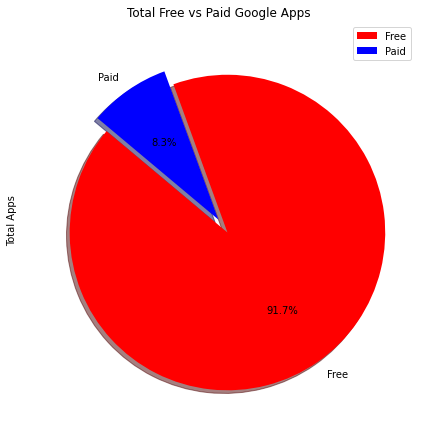

In [405]:
colors = ['red', 'blue']
explode = (0.1, 0)
plot = df.plot.pie(y='Total Apps',figsize=(9,6), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Total Free vs Paid Google Apps',fontsize = 12)

plt.tight_layout()
plt.show()


In [406]:

#show Dataframe without duplicates

del google_playstore_games['Category']
del google_playstore_games['Rating']

google_playstore_games

KeyError: 'Category'